<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/FeatureEngineering_Regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#특성 공학
원시 데이터를 모델이 이해하고 처리할 수 있는 유용한 피처로 변환하는 과정이다. 이를 통해 모델의 성능을 향상시키고, 해석 가능성을 높이며, 데이터의 복잡한 관계를 보다 명확하게 만든다.

1. 데이터 전처리
2. 피처 스케일링
3. 피처 생성
4. 차원 축소
5. 시간 시계열 데이터 처리

아래 예제를 보면 PolynomialFeatures, StandardScaler, Ridge, Lasso를 따로 import해서 사용하는데 그 이유는 모듈화, 유연성, 유연한 튜닝을 위해 따로 사용함.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [8]:
# 주소에서 파일 읽어와서 데이터 프레임으로 만들기, fit에서 사용 가능
perch_pull= pd.read_csv('https://bit.ly/perch_csv_data')

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target= train_test_split(perch_pull, perch_weight, random_state=42)


"""
변환기(transformer)는 fit()과 transform() 메서드를 가지고 있다
특성을 만들거나 전처리 하기위한 클래스 제공
"""
# include_bias=False -> 절편 위한 항 제거(1제거)
# degree=x -> 차수를 x로 지정 기본 2, 모델 복잡도
poly=PolynomialFeatures(include_bias=False)
# 그저 특성의 개수(조합)를 파악, 타깃 데이터 필요 없음
poly.fit([[2,3]])
# 데이터 변환(특성 생성)
"""
머신러닝에서 선형 모델을 쓰면서도
비선형(곡선) 관계를 학습하고 싶어서 사용
딥러닝에선 활성화 함수(activation function) 사용
다항 회귀는 딥러닝에 비해 빠르고 단순하고 적은 데이터에 유리해서 사용함
"""
print(poly.transform([[2,3]]))


poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)
# 9개의 특성이 어떻게 만들어졌는지 확인 띄어쓰기는 곱한 것을 의미
print(poly.get_feature_names_out())

# 테스트 세트 변환
test_poly=poly.transform(test_input)

# 다중 모델 훈련
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[[2. 3. 4. 6. 9.]]
(42, 9)
['length' ' height' ' width' 'length^2' 'length  height' 'length  width'
 ' height^2' ' height  width' ' width^2']
0.9903183436982125
0.9714559911594111



차수 5로 바꾸고 다시

In [9]:
poly=PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)
print(poly.get_feature_names_out())
"""
차수 5로 바꾸니까 모델 표현력이 늘어 복잡한 형태 가능해짐. 그래프가 많이 휘어질 수 있음
"""
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
# 값이 -144가 나오는데 음수-> 값이 터무니 없을 정도로 예측 실패, 테스트에서 붕괴(오버피팅)
# 너무 훈련 데이터에 맞춰짐
print(lr.score(test_poly, test_target))

(42, 55)
['length' ' height' ' width' 'length^2' 'length  height' 'length  width'
 ' height^2' ' height  width' ' width^2' 'length^3' 'length^2  height'
 'length^2  width' 'length  height^2' 'length  height  width'
 'length  width^2' ' height^3' ' height^2  width' ' height  width^2'
 ' width^3' 'length^4' 'length^3  height' 'length^3  width'
 'length^2  height^2' 'length^2  height  width' 'length^2  width^2'
 'length  height^3' 'length  height^2  width' 'length  height  width^2'
 'length  width^3' ' height^4' ' height^3  width' ' height^2  width^2'
 ' height  width^3' ' width^4' 'length^5' 'length^4  height'
 'length^4  width' 'length^3  height^2' 'length^3  height  width'
 'length^3  width^2' 'length^2  height^3' 'length^2  height^2  width'
 'length^2  height  width^2' 'length^2  width^3' 'length  height^4'
 'length  height^3  width' 'length  height^2  width^2'
 'length  height  width^3' 'length  width^4' ' height^5'
 ' height^4  width' ' height^3  width^2' ' height^2  width^3'
 ' hei

#규제
모델이 훈련 데이터를 과도하게 학습하지 못하도록 막기.
특성의 스케일 정규화 먼저 해야함.
릿지와 라쏘 두가지 모델이 있음
##릿지 : L2 규제
가중치의 제곱합 더함, 큰 가중치 방지
모든 특성 사용할 때 사용
Loss+α∑w^2
##라쏘 : L1 규제
가중치의 절댓값 추가, 불필요한 가중치 값을 0으로 만듬
불필요 특성 제거 원하면 사용
Loss+α∑∣w∣

In [10]:
from sklearn.preprocessing import StandardScaler
"""
표준점수로 정규화
각 특성을 평균 0, 표준편차 1로 변환
다항 특성은 값 크기 차이가 너무 커서(x랑 x^5너무 차이큼)
"""
ss=StandardScaler()
#각 특성의 평균, 표준편차 계산해서 기억, train에만 해야함!
ss.fit(train_poly)
# 훈련 데이터 변환
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

##릿지 회귀

0.9896101671037343
0.9790693977615387


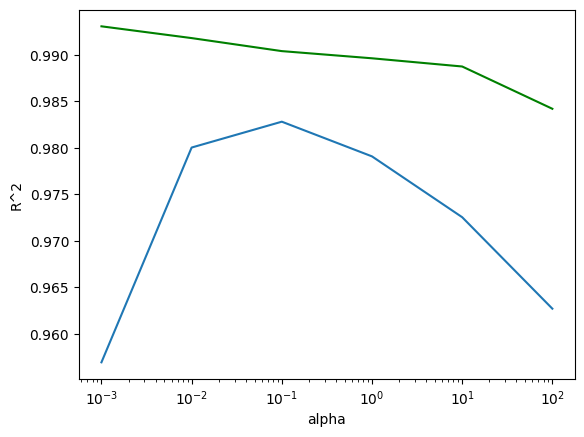

In [17]:
from sklearn.linear_model import Ridge

# 릿지 규제를 추가
ridge=Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
# 차수가 5인데도 릿지 규제를 추가해서 테스트에서 붕괴되지 않음. 훈련 데이터는 좀 떨어졌으나..
print(ridge.score(test_scaled, test_target))

"""
릿지 회귀에서 alpha값으로 규제 정도 정할 수 있음 a>0
a 값이 클수록 규제 강도가 커짐
"""
train_score=[]
test_score=[]
# 각 alpha값으로 테스트하고 그래프 표시
alpha_list=[0.001,0.01,0.1,1,10,100]
for alphas in alpha_list:
  # 릿지 모델
  ridge=Ridge(alpha=alphas)
  ridge.fit(train_scaled, train_target)
  # 리스트에 값 추가
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(alpha_list, train_score, color='green')
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
# 축을 로그 스케일로 설정
plt.xscale('log')
plt.show()

# alpha=0.1이 가장 좋음

##라쏘 회귀

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


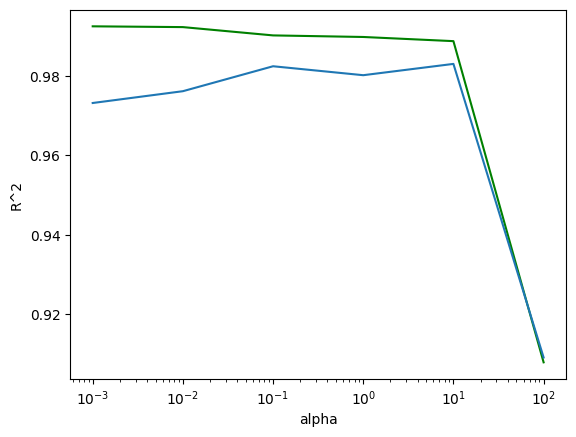

40


In [24]:
from sklearn.linear_model import Lasso

train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alphas in alpha_list:
  # 라쏘 모델, max_iter->반복 횟수를 늘리기 위함(부족하지 않도록)
  lasso=Lasso(alpha=alphas, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
plt.plot(alpha_list, train_score, color='green')
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
# 축을 로그 스케일로 설정
plt.xscale('log')
plt.show()
# 10이 최적

# 10으로 설정
lasso=Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
# 계수가 0인 특성의 개수 40개
print(np.sum(lasso.coef_==0))